<a href="https://colab.research.google.com/github/joserobertofox/datascience/blob/main/MVP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Machine Learning & Analytics**
## **Aluno: José Roberto Assis Silva**


## **1. Definição do Problema**

O dataset que será utilizado neste projeto e o **HCV Data Set** que contém dados para previsão de hepatite C. A fonte deste dataset tem como doador: Instituto de Química Clínica; Universidade de Medicina de Hannover (MHH); Hannover, Alemanha. O conjunto de dados contém valores laboratoriais de doadores de sangue e pacientes com hepatite C e valores demográficos como idade e será tratado como um problema de aprendizado supervisionado. Estes atributos de exames laboratoriais contém varíaveis preditoras ao atributo alvo (variável de classe) para classificar se os doadores têm ou não hepatite C. A variável de classe é **CATEGORY (valores: '0=Doador de Sangue', '0s=Doador de Sangue suspeito', '1=Hepatite', '2=Fibrose', '3=Cirrose')**. Para mais informações sobre este dataset, consulte: https://archive.ics.uci.edu/ml/datasets/HCV+data.

**Atributos do Dataset:**

1. **ID**    - ID do paciente N°
2. **Category** - (valores: '0=Doador de Sangue', '0s=Doador de Sangue suspeito', '1=Hepatite', '2=Fibrose', '3=Cirrose')
3. **Age** - Idade em anos
4. **Sex** - Sexo (m/f)
5. **ALB** - Albumina (3,5 a 5,2 g/dL)
6. **ALP** - Fosfatase Alcalina (40 U/L a 150 U/L)
7. **ALT** - Alamina Aminotransferase (5 a 40 U/L)TGO
8. **AST** - Aspartato Aminotransferase (7 a 56 U/L)TGP
9. **BIL** - Bilirrubina (0,2 a 1,1 mg/dL)
10. **CHE** - Colinesterase Eritrocitaria (h: 4620 - 11500 U/L. ; m: 3930 - 10800 U/L)
11. **CHOL** - Colesterol (menor 200mg/dL)
12. **CREA** - Creatina (h: 0,6 - 1,30 mg/dL ; m: 0,50 - 1,1 mg/dL)
13. **GGT** - Gama Glutamil Transferase (h: até 85 U/L. ; m: até 38 U/L)
14. **PROT** - Proteinas Totais (6 a 8 g/dL)



In [150]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno as ms # para tratamento de missings
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.preprocessing import OrdinalEncoder #para fazer codificação ordinal (ordinal encoding)
from sklearn.model_selection import StratifiedKFold #Cross Validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


In [135]:
# Configuração para tratamento de erros
import warnings
warnings.filterwarnings("ignore")

## **2. Carga do Dataset**

Vou utilizar o pacote Pandas (Python Data Analysis Library) para fazer a carga do arquivo **hcvdata0** em formato **.csv** e a partir do carregamento vou fazer uma análise exploratória.



In [136]:
# Carregamento do arquivo hcvdata0.csv usando Pandas e usando a URL do repositório no GITHUB

# Varíavel recebendo a URL do repositório para onde foi feito o upload do arquivo no GITHUB
url = "https://raw.githubusercontent.com/joserobertofox/datascience/main/hcvdat01.csv"

# Informando o cabeçalho das colunas e deixando o ID de fora do meu Dataset
colunas = ['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# Carregando o arquivo utilizando as descrições informadas das colunas
dataset = pd.read_csv(url, names=colunas, skiprows=1, delimiter=',')

In [137]:
dataset.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## **3. Pré-Processamento dos Dados**


### 3.1. Transformações Categóricas

Vou fazer a codificação ordinal da classe target **Category** para converter em numérica respeitando sua ordenação. Vou fazer o mesmo com o atributo não ordinal **Sex** do dataset (Variável qualitativa nominal) para fazer a codificação ordinal.

#### 3.1.1 Codificação Ordinal

In [138]:
#Guardando dataset original
datasetPreProc = dataset

# Imprimindo parte do dataset antes da codificação ordinal
print("Antes da codificação ordinal da classe Category e do atributo Sex:")
print(dataset.values[531:544,0:]) # Imprimindo o intervalo da linha 531 a 544 (onde retrata 3 instâncias da classe) com os valores da classe Category

# Ordinal encoding para a classe Category
datasetPreProc['Category']=OrdinalEncoder().fit_transform(datasetPreProc.values[:,0:1])

# Ordinal encoding para a classe Category
datasetPreProc['Sex']=OrdinalEncoder().fit_transform(datasetPreProc.values[:,2:3])

Antes da codificação ordinal da classe Category e do atributo Sex:
[['0=Blood Donor' 68 'f' 41.4 102.3 38.4 26.4 6.8 8.5 6.79 59.0 23.8 68.9]
 ['0=Blood Donor' 70 'f' 40.0 97.9 15.1 15.9 6.8 11.46 5.08 62.0 19.2
  65.3]
 ['0s=suspect Blood Donor' 47 'm' 22.5 124.0 79.5 46.7 2.3 6.83 4.3 170.0
  345.6 58.6]
 ['0s=suspect Blood Donor' 48 'm' 24.9 116.9 49.2 24.3 4.9 3.44 5.25 29.0
  83.0 47.8]
 ['0s=suspect Blood Donor' 49 'm' 21.6 42.2 9.5 10.6 2.4 3.75 3.01 64.0
  38.9 44.8]
 ['0s=suspect Blood Donor' 55 'm' 47.3 106.0 208.8 130.6 0.8 14.8 8.08
  76.0 71.6 78.3]
 ['0s=suspect Blood Donor' 71 'm' 14.9 69.8 19.7 95.2 9.8 13.3 2.61 9.0
  7.6 47.0]
 ['0s=suspect Blood Donor' 74 'm' 20.3 84.0 22.8 43.0 5.7 4.91 3.19 52.0
  218.3 47.8]
 ['0s=suspect Blood Donor' 59 'f' 19.3 208.2 325.3 146.6 6.9 5.33 4.72
  32.0 295.6 53.1]
 ['1=Hepatitis' 38 'm' 45.0 56.3 nan 33.1 7.0 9.58 6.0 77.9 18.9 63.0]
 ['1=Hepatitis' 19 'm' 41.0 nan 87.0 67.0 12.0 7.55 3.9 62.0 65.0 75.0]
 ['1=Hepatitis' 23 'm' 47.0

In [139]:
# Imprimindo os dados transformados pela codificação ordinal
print("Classe e atributo transformados:")
print(datasetPreProc.values[531:544,0:]) # Imprimindo o intervalo da linha 531 a 544 (onde retrata 3 instâncias da classe) com os valores da classe Category

Classe e atributo transformados:
[[  0.    68.     0.    41.4  102.3   38.4   26.4    6.8    8.5    6.79
   59.    23.8   68.9 ]
 [  0.    70.     0.    40.    97.9   15.1   15.9    6.8   11.46   5.08
   62.    19.2   65.3 ]
 [  1.    47.     1.    22.5  124.    79.5   46.7    2.3    6.83   4.3
  170.   345.6   58.6 ]
 [  1.    48.     1.    24.9  116.9   49.2   24.3    4.9    3.44   5.25
   29.    83.    47.8 ]
 [  1.    49.     1.    21.6   42.2    9.5   10.6    2.4    3.75   3.01
   64.    38.9   44.8 ]
 [  1.    55.     1.    47.3  106.   208.8  130.6    0.8   14.8    8.08
   76.    71.6   78.3 ]
 [  1.    71.     1.    14.9   69.8   19.7   95.2    9.8   13.3    2.61
    9.     7.6   47.  ]
 [  1.    74.     1.    20.3   84.    22.8   43.     5.7    4.91   3.19
   52.   218.3   47.8 ]
 [  1.    59.     0.    19.3  208.2  325.3  146.6    6.9    5.33   4.72
   32.   295.6   53.1 ]
 [  2.    38.     1.    45.    56.3     nan  33.1    7.     9.58   6.
   77.9   18.9   63.  ]
 [  2.    

### 3.2. Tratamento de Missings e Limpeza
Analisando o dataset verifiquei que existem poucos valores missings (faltantes) e vou preparar estes dados. Verifiquei também que não existem valores "0" nos atributos. Através do comando abaixo verifiquei que o dataset possui missings nos atributos ALP(18), ALT(1), CHOL(10) e PROT(1). Analisando a visualização da nulidade concluimos que a proporção de nulos nos atributos não é alta. Vamos tratar os mesmos substituindo pela mediana.

In [140]:
# verificando nulls (missings) no dataset
datasetPreProc.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

<Axes: >

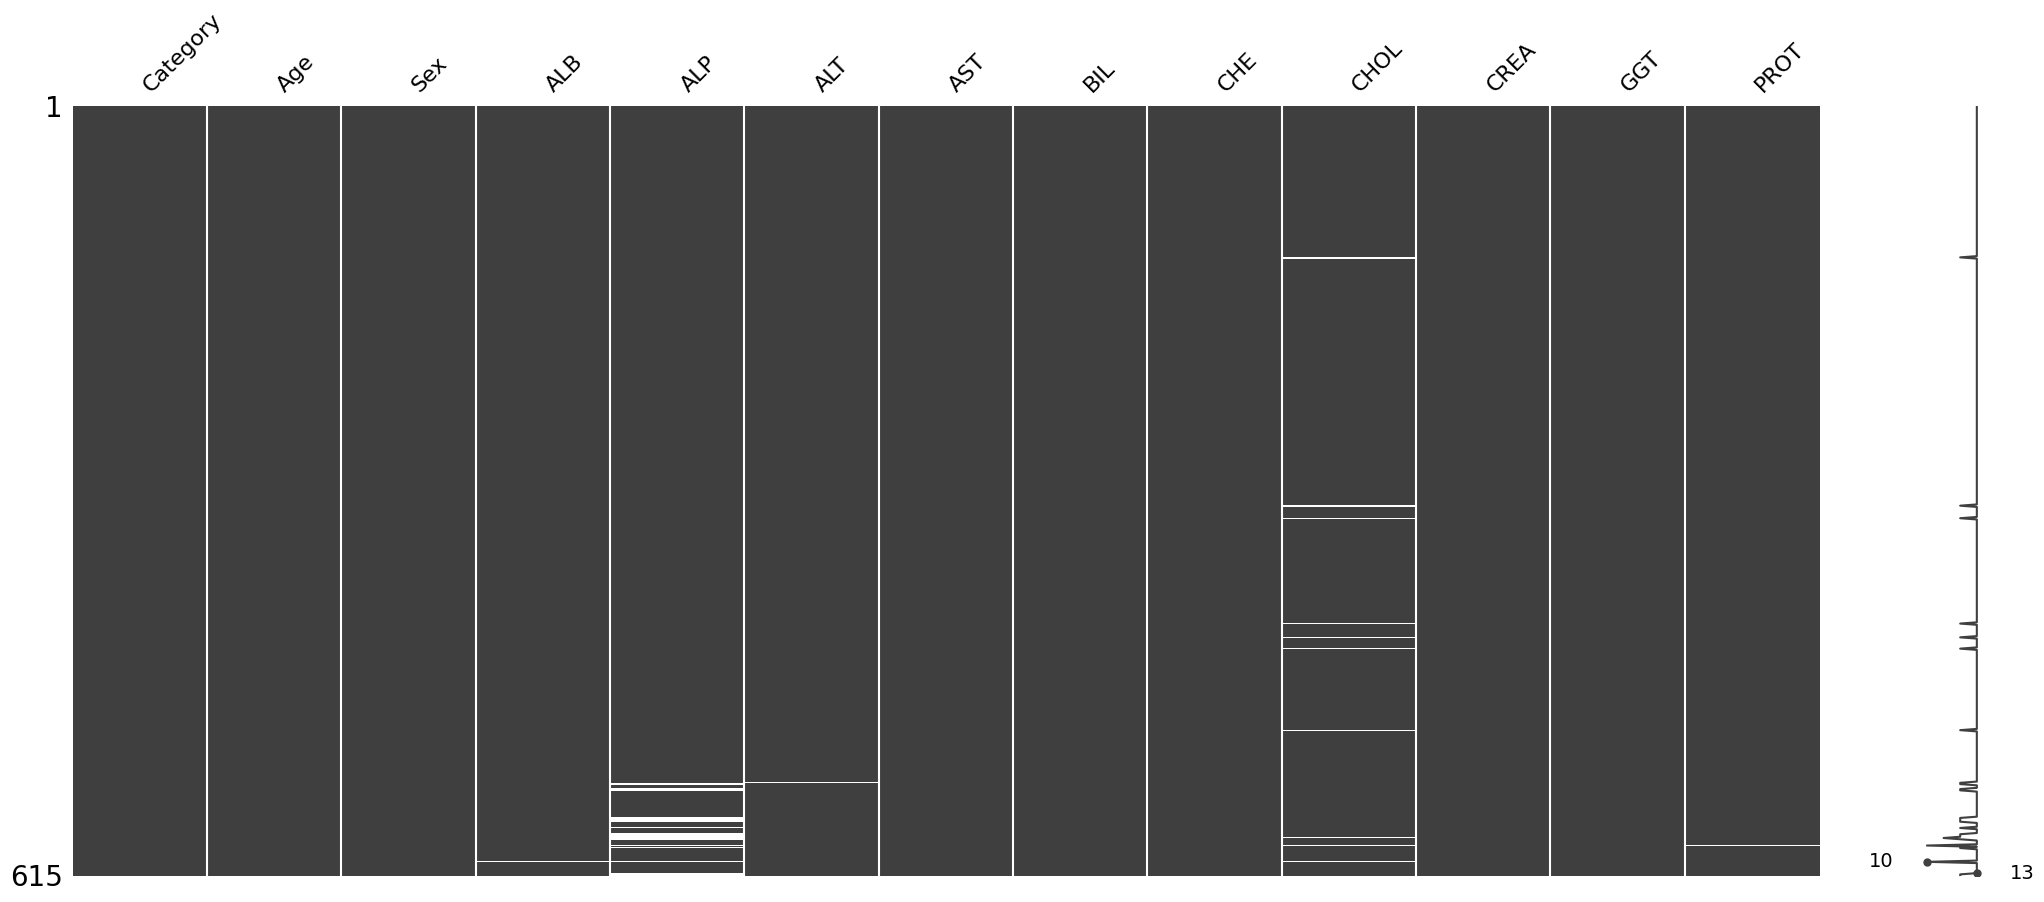

In [141]:
# Exibindo visualização matricial da nulidade da copia do dataset
ms.matrix(datasetPreProc)

<Axes: >

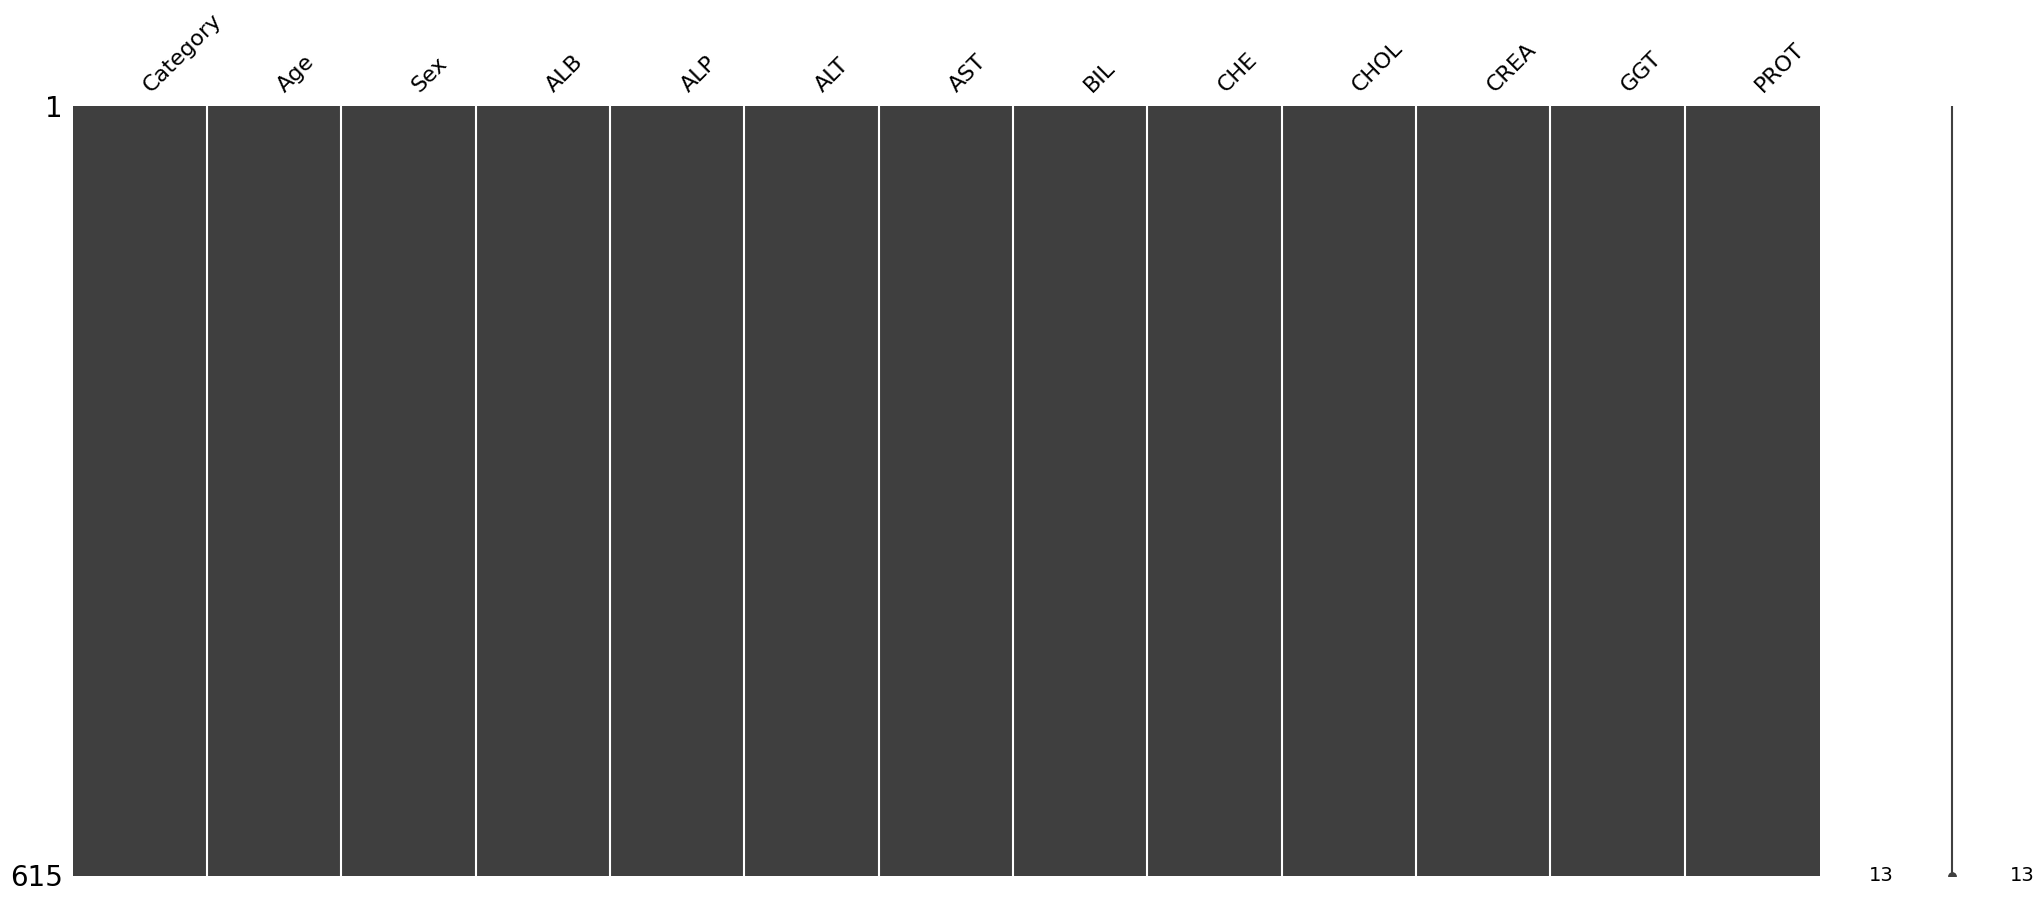

In [142]:

# Substituindo os NaN de 'ALB', 'ALP', 'ALT', 'CHOL' e 'PROT' pela mediana da coluna
datasetPreProc['ALB'].fillna(datasetPreProc['ALB'].median(), inplace=True)
datasetPreProc['ALP'].fillna(datasetPreProc['ALP'].median(), inplace=True)
datasetPreProc['ALT'].fillna(datasetPreProc['ALT'].median(), inplace=True)
datasetPreProc['CHOL'].fillna(datasetPreProc['CHOL'].median(), inplace=True)
datasetPreProc['PROT'].fillna(datasetPreProc['PROT'].median(), inplace=True)

# Exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetPreProc)

In [144]:
# Verificando nulls no dataset tratado
datasetPreProc.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

### 3.3. Separação em Conjunto de Treino e Conjunto de Teste com Holdout
Vou utilizar uma técnica de amostragem usando um conjunto teste ou conjunto de validação que é uma amostra de dados que não será utilizada na construção do modelo final. Será utilizada somente no final para validar se a construção do modelo foi bem construída e também para termos uma análise do modelo com dados ainda não utilizados. Criarei um conjunto de dados com 80% do dataset para criarmos o modelo e guardarei 20% para teste de validação, usando a estratégia train-test-split. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 1 a 12) e qual é a coluna da classe alvo (Y - 0). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente. Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [145]:
test_size = 0.20
seed = 12

# Separação em conjuntos de treino e teste (dataset Pré-Processado)
array = datasetPreProc.values
X = array[:,1:13]
y = array[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

### 3.3. Validação Cruzada - Cross Validation
Definiremos abaixo os parâmetros e número de partições da validação cruzada. Utilizando este métodos poderemos lidar com o DILEMA BIAS X VARIÂNCIA para manter o equilíbrio entre underfitting e overfitting, estimando o desempenho de generalização do modelo não apenas uma vez (como no holdout), mas diversas vezes (k) deninido no parâmento num-particoes.

In [146]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

## 4. Modelagem e Inferência

### 4.1. Criação e Validação de Modelos: Linha Base

KNN: 0.902449 (0.017623)
CART: 0.898327 (0.024160)
NB: 0.912857 (0.047968)
SVM: 0.898408 (0.012547)


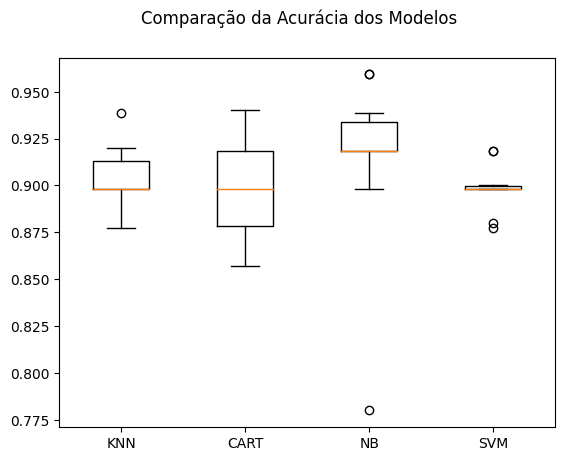

In [147]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [149]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.8780487804878049
